In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [15]:

# Step 3: Initial data check
print(df.head())
print(df.info())

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cr

In [4]:
# Step 4: Clean and prepare the dataset
# Drop columns that are not useful for prediction
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [7]:
print(df.columns.tolist())


['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [8]:
# Step 5: Encode categorical features (Geography and Gender)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])      # Male=1, Female=0 (or vice versa)
df["Geography"] = le.fit_transform(df["Geography"])  # Convert strings to integers

In [9]:

# Step 6: Separate features and target
X = df.drop("Exited", axis=1)  # Features
y = df["Exited"]               # Target column (churn: 1 = exited, 0 = stayed)

In [10]:
# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 8: Train a classification model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Step 9: Make predictions
y_pred = model.predict(X_test)

In [13]:
# Step 10: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8645

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



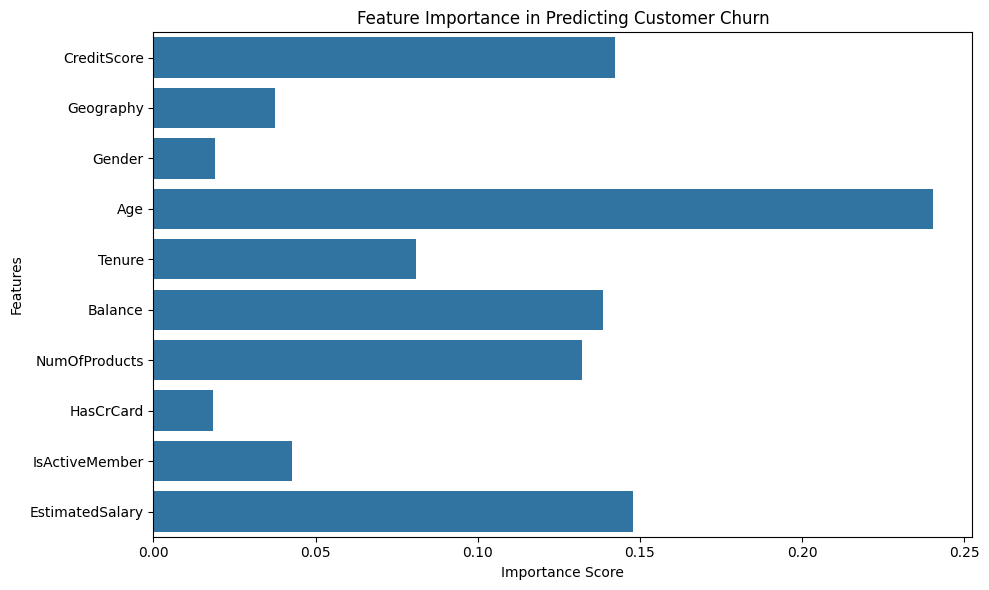

In [17]:
# Step 11: Analyze feature importance to understand what influences churn

# Get the importance of each feature from the trained model
feature_importances = model.feature_importances_

# Get the names of the features (column names)
feature_names = X.columns


# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
sns.barplot(x=feature_importances, y=feature_names)

# Add titles and labels
plt.title("Feature Importance in Predicting Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")

# Make sure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()
